# 🩺 Diabetes Risk Classification (Multiclass) — BRFSS 2015 Dataset
**Goal**: Predict diabetes status (No Diabetes, Prediabetes, Diabetes) using health, lifestyle, and demographic features.

## 📂 Dataset Information

This project uses the **`diabetes_012_health_indicators_BRFSS2015.csv`** dataset from Kaggle, derived from the Behavioral Risk Factor Surveillance System (BRFSS) 2015 survey.

- 📦 **Source**: [Kaggle - Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
- 📊 **Rows**: 253,680
- 🔣 **Columns**: 22 health indicators + 1 target variable (`Diabetes_012`)

### 🎯 Target Variable: `Diabetes_012`

- **0**: No diabetes
- **1**: Prediabetes
- **2**: Diabetes

The dataset contains health, behavioral, and demographic data from a U.S. health survey. The goal is to build predictive models and extract insights to understand key risk factors for diabetes.

---




## 📥 Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_012_health_indicators_BRFSS2015.csv to diabetes_012_health_indicators_BRFSS2015.csv


In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
# View shape and first few rows
print("Shape:", df.shape)
df.head()

Shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0




---



## 🧼 Data Cleaning


In [4]:
# Summary statistics
df.describe()
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


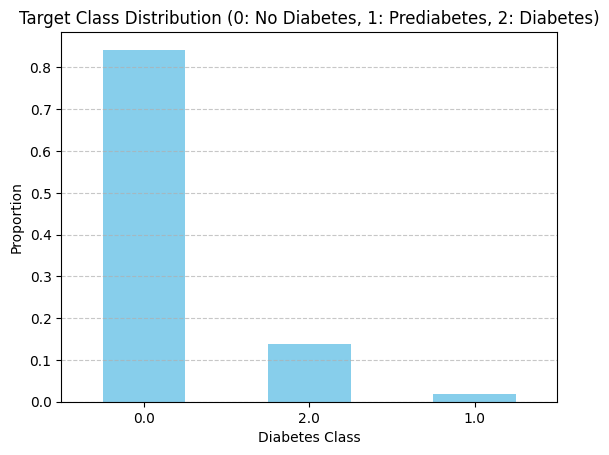

In [5]:
# Check class distribution of target
df['Diabetes_012'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Target Class Distribution (0: No Diabetes, 1: Prediabetes, 2: Diabetes)')
plt.xlabel('Diabetes Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
df['Diabetes_012'].value_counts(normalize=True).rename({0: "No Diabetes", 1: "Prediabetes", 2: "Diabetes"})

,proportion
Diabetes_012,
No Diabetes,0.842412
Diabetes,0.139333
Prediabetes,0.018255


In [7]:
data = df.copy()

In [8]:
data.duplicated().sum()

np.int64(23899)

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(229781, 22)

In [11]:
low_variance = data.nunique().sort_values()
print(low_variance)


HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
HeartDiseaseorAttack     2
Stroke                   2
Fruits                   2
PhysActivity             2
AnyHealthcare            2
NoDocbcCost              2
Veggies                  2
HvyAlcoholConsump        2
Sex                      2
DiffWalk                 2
Diabetes_012             3
GenHlth                  5
Education                6
Income                   8
Age                     13
MentHlth                31
PhysHlth                31
BMI                     84
dtype: int64


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [13]:
data['Diabetes_012'].value_counts()

,count
Diabetes_012,
0.0,190055
2.0,35097
1.0,4629



- Checked for missing values: ✅ None found
- Dropped duplicate records: 23,899 duplicates removed
- Converted categorical variables where needed


---



## 📊 Exploratory Data Analysis (EDA)

We performed three levels of exploratory analysis to understand feature patterns, class imbalance, and relationships:

- **Univariate Analysis**: Distribution of target and key features
- **Bivariate Analysis**: Relationship of features with diabetes status
- **Correlation Heatmap**: Linear relationships across all features





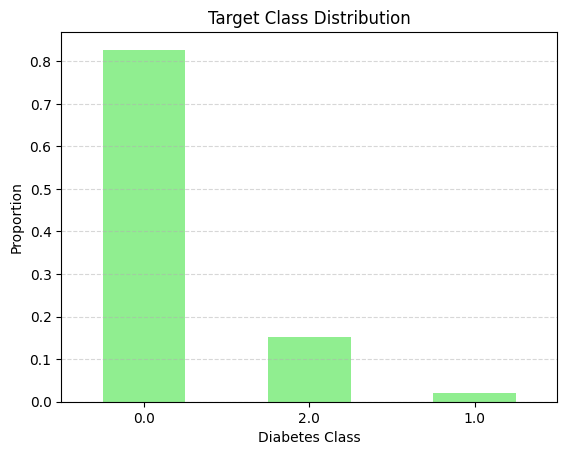

In [14]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar', color='lightgreen')
plt.title('Target Class Distribution')
plt.xlabel('Diabetes Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

### 1️⃣ Univariate Analysis


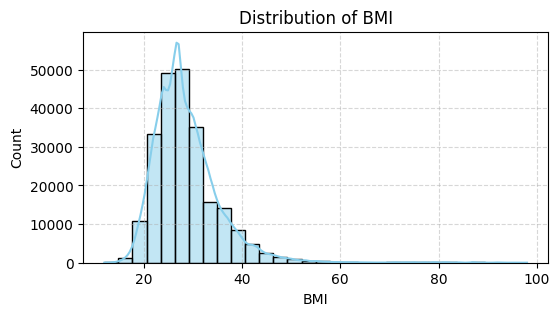

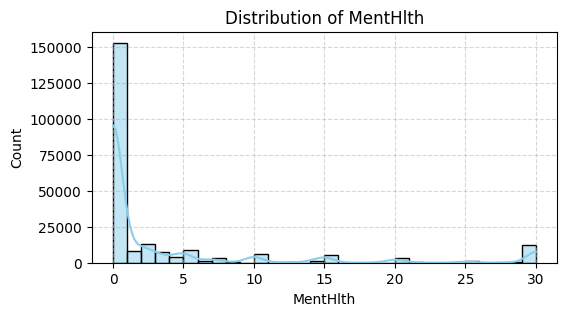

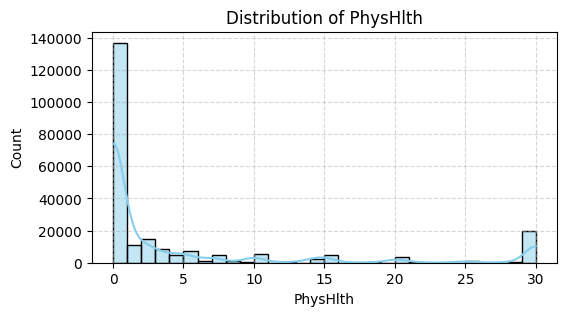

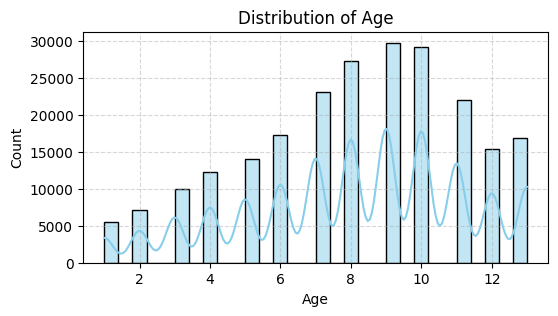

In [15]:
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']  # add more as needed

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


- **Target Variable (`Diabetes_012`)** is highly imbalanced:
  - Class 0 (No Diabetes): ~84%
  - Class 1 (Prediabetes): ~1–2%
  - Class 2 (Diabetes): ~14%
- Numeric features like `BMI`, `Age`, `MentHlth`, and `PhysHlth` showed varied distributions and several outliers.

### 2️⃣ Bivariate Analysis (Categorical Features vs Diabetes)


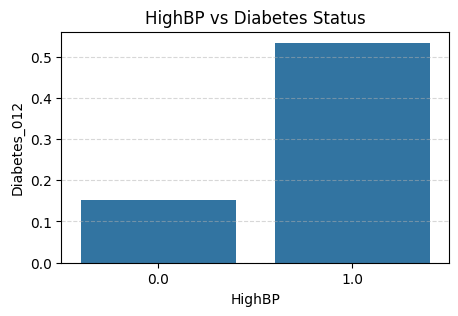

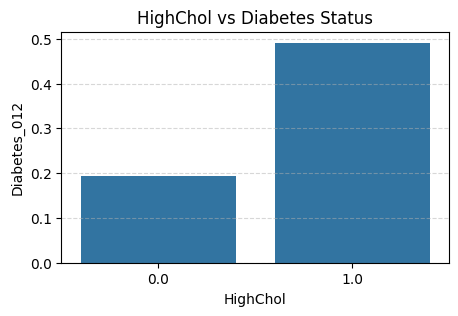

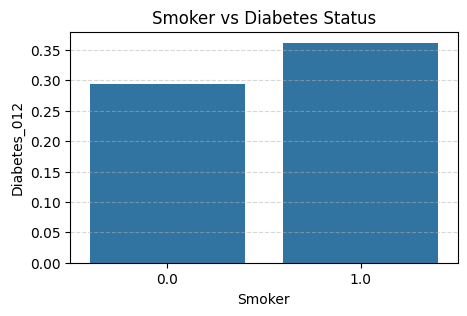

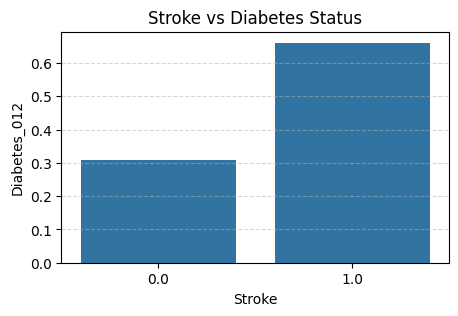

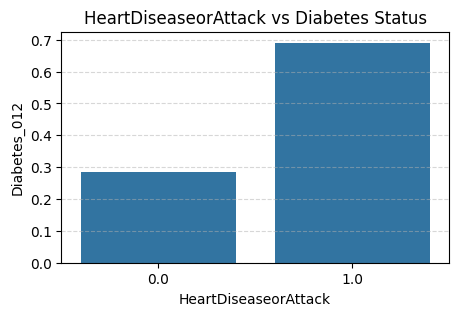

In [16]:
binary_cols = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack']

for col in binary_cols:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=col, y='Diabetes_012', data=data, ci=None)
    plt.title(f'{col} vs Diabetes Status')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

- Higher diabetes risk is associated with **HighBP**, **HeartDisease**, and **Stroke**
- Smokers also show slightly elevated diabetes levels

### 3️⃣ Bivariate Analysis (Numerical Features)


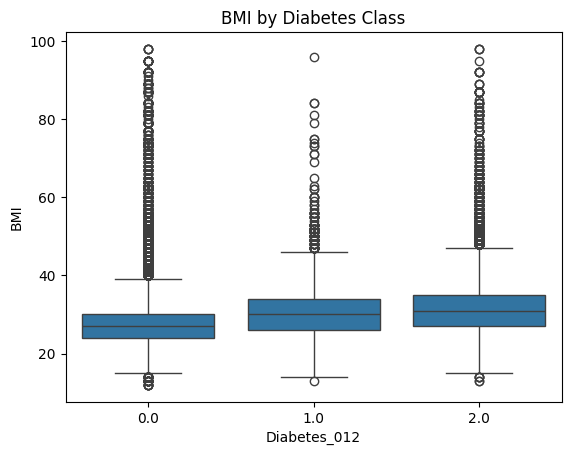

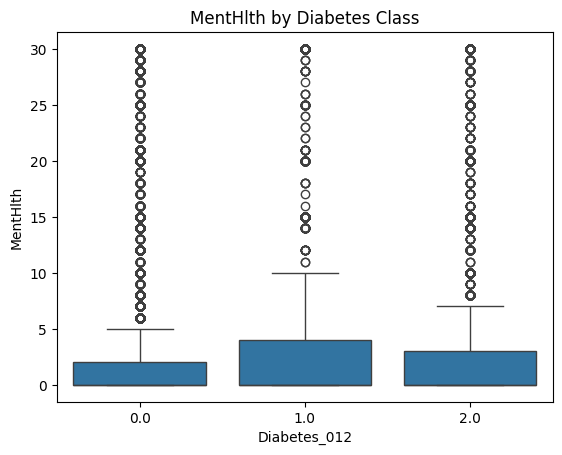

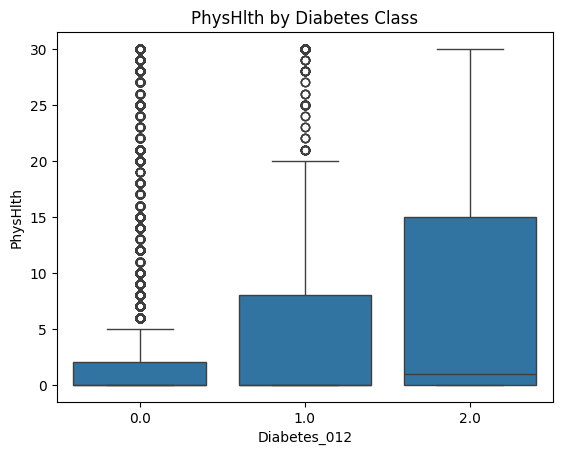

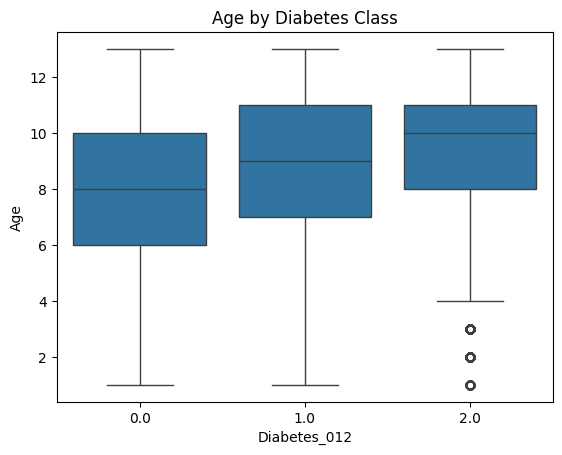

In [17]:
# Boxplots for numerical features
numerical_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

for feature in numerical_features:
    sns.boxplot(data=df, x='Diabetes_012', y=feature)
    plt.title(f'{feature} by Diabetes Class')
    plt.show()


- BMI increases slightly across diabetes classes.
- People with diabetes report more days of poor physical and mental health.
- Age increases with diabetes severity.


### 4️⃣ Correlation Heatmap

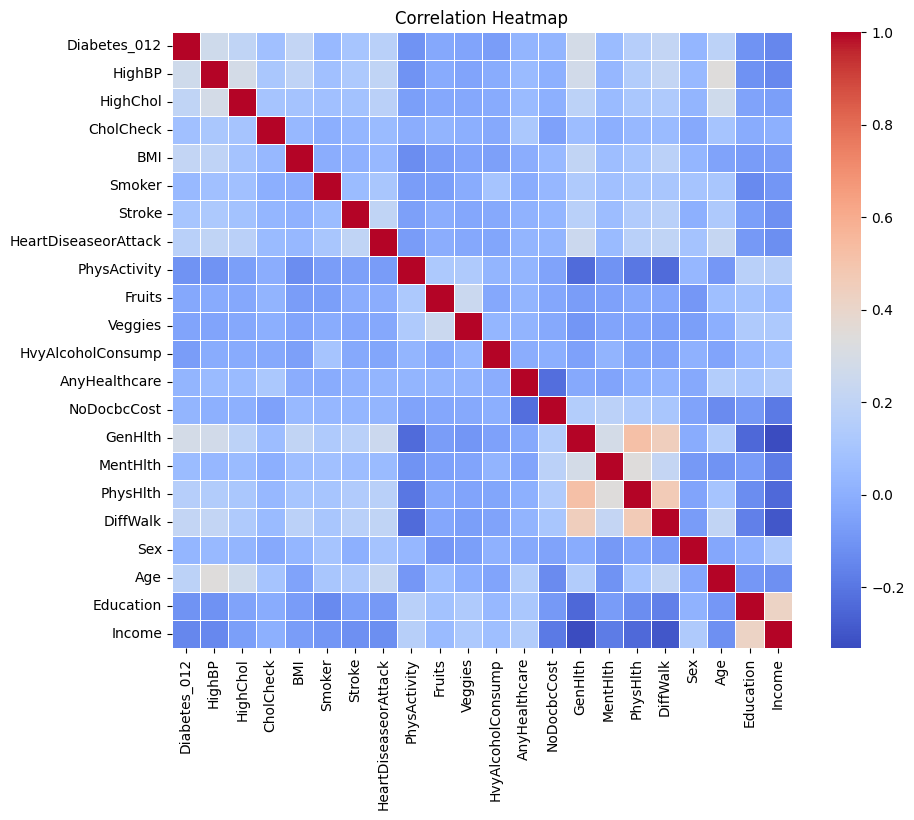

In [18]:
plt.figure(figsize=(10, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Positively correlated with diabetes: `HighBP`, `HighChol`, `GenHlth`, `Age`, `BMI`
- Negatively correlated: `Education`, `Income`, `PhysActivity`
- `GenHlth` correlates strongly with both physical and mental health metrics


---



## 🏗️ Feature Engineering Plan

✅ 1. Remove Constant or Low-Variance Features

In [19]:
low_variance = data.nunique()
low_variance_cols = low_variance[low_variance == 1].index.tolist()
print("Constant columns:", low_variance_cols)

# Drop them if any
data.drop(columns=low_variance_cols, inplace=True)


Constant columns: []


✅ 2. Encoding Binary/Categorical Columns

In [20]:
data.select_dtypes(include='object').nunique()
data = pd.get_dummies(data, drop_first=True)

✅ 3. Scale Numeric Features

In [21]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

✅ 4. Separate Features and Target

In [22]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']



---



## ⚖️**Handling Class imbalance**

🔄 Apply SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Split first (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Apply SMOTE to training set only
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Optional: Check new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE: Counter({0.0: 152043, 2.0: 28078, 1.0: 3703})
After SMOTE:  Counter({0.0: 152043, 2.0: 152043, 1.0: 152043})



- Applied **SMOTE (Synthetic Minority Oversampling Technique)** on training set
- Balances classes 1 and 2 to avoid bias toward majority class


---




## 🤖 Modeling & Evaluation

1️⃣ Multinomial Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, digits=3))

Logistic Regression Results:
[[24379  7204  6429]
 [  265   306   355]
 [ 1236  1780  4003]]
              precision    recall  f1-score   support

         0.0      0.942     0.641     0.763     38012
         1.0      0.033     0.330     0.060       926
         2.0      0.371     0.570     0.450      7019

    accuracy                          0.624     45957
   macro avg      0.449     0.514     0.424     45957
weighted avg      0.836     0.624     0.701     45957



2️⃣ Random Forest




In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=3))

Random Forest Results:
[[35283    94  2635]
 [  756     1   169]
 [ 4861    23  2135]]
              precision    recall  f1-score   support

         0.0      0.863     0.928     0.894     38012
         1.0      0.008     0.001     0.002       926
         2.0      0.432     0.304     0.357      7019

    accuracy                          0.814     45957
   macro avg      0.434     0.411     0.418     45957
weighted avg      0.780     0.814     0.794     45957



3️⃣ XGBoost

In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost classifier for multiclass
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob' for probabilities
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, digits=3))

XGBoost Results:
[[36374     0  1638]
 [  800     0   126]
 [ 5085     0  1934]]
              precision    recall  f1-score   support

         0.0      0.861     0.957     0.906     38012
         1.0      0.000     0.000     0.000       926
         2.0      0.523     0.276     0.361      7019

    accuracy                          0.834     45957
   macro avg      0.461     0.411     0.422     45957
weighted avg      0.792     0.834     0.805     45957



Three models were trained and evaluated:

| Model                | Accuracy | Macro Precision | Macro Recall | Macro F1 |
|---------------------|----------|------------------|--------------|----------|
| Logistic Regression | 0.624    | 0.449            | 0.515        | 0.424    |
| Random Forest        | 0.814    | 0.433            | 0.410        | 0.416    |
| XGBoost              | **0.834**| **0.462**        | 0.411        | **0.422** |

### 🎯 Class-wise Evaluation
- Class 1 (Prediabetes) was the hardest to predict for all models.
- XGBoost achieved the best balance across all classes.


---





### 🧠 Feature Importance (XGBoost)

<Figure size 1200x800 with 0 Axes>

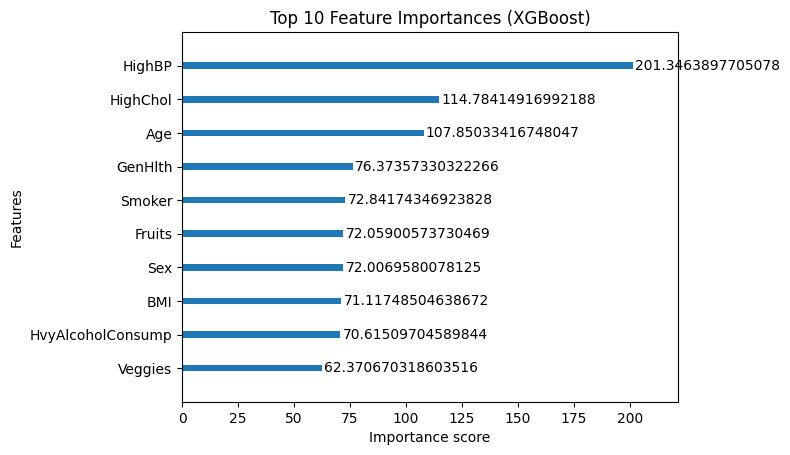

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
ax=xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title('Top 10 Feature Importances (XGBoost)')
ax.grid(False)
plt.show()

Top predictors:
- HighBP, HighChol, Age, GenHlth, BMI, Smoking, Fruits & Veggie intake

🧩 Confusion Matrix (XGBoost)

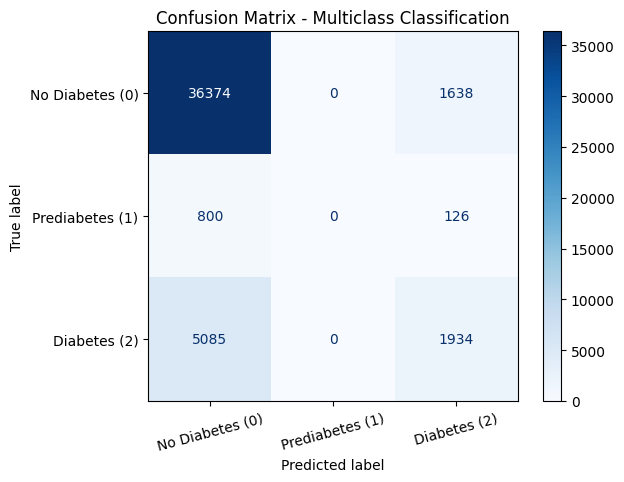

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display with class labels
labels = ['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer format
plt.title("Confusion Matrix - Multiclass Classification")
plt.xticks(rotation=15)
plt.show()

- XGBoost achieved strong true positive and true negative rates on balanced test data.

### Class-wise F1-Score Plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df, x='Class', y='F1 Score', hue='Model')
plt.title('F1 Score per Class by Model')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylabel('F1 Score')
plt.xlabel('Diabetes Class')
plt.legend(title='Model')
plt.tight_layout()
plt.show()



---



## 📈 Visual Insights

- Class-wise F1 Score plots revealed performance gaps for minority class (Prediabetes).
- Correlation heatmap helped identify redundant or weak features.
- Boxplots showed differences in BMI, Age, Health indicators across diabetes classes.


---




## 🧠 Insights & Interpretation

- **Medical predictors** like high blood pressure and cholesterol are most important.
- **Lifestyle choices** (smoking, fruit/veg intake, alcohol) also influence risk.
- **Class 1 (Prediabetes)** remains difficult to predict — more data needed.

> XGBoost was selected as the final model due to its best overall and class-wise performance.


---



## ✅ Conclusion

This multiclass classification project successfully identified key predictors of diabetes using health survey data. Despite the challenges of class imbalance, we were able to:

- Build and compare multiple models
- Improve minority class recall with SMOTE
- Highlight critical health and lifestyle risk factors


---



### 📌 Recommendation
Deploy XGBoost as a baseline diabetes screening tool, with future work focused on:

- Collecting more data for prediabetic cases
- Including lab data or longitudinal features
- Exploring cost-sensitive learning or ensemble stacking

---
